In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from skimage import io, img_as_float, img_as_ubyte
from time import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import string
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
fig = plt.figure(figsize =(10, 7))

<Figure size 1000x700 with 0 Axes>

### 1. Зниження розмірності і візуалізація даних
Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат.

Датасет с першої лаби

In [2]:
# https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
df = pd.read_csv(r'...', encoding='unicode_escape')
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]
len_c = 5000
if len(class_0) > len_c:
    class_0 = class_0.sample(n=len_c, random_state=42)
if len(class_1) > len_c:
    class_1 = class_1.sample(n=len_c, random_state=42)

balanced_df = pd.concat([class_0, class_1])
df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10000 non-null  int64  
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

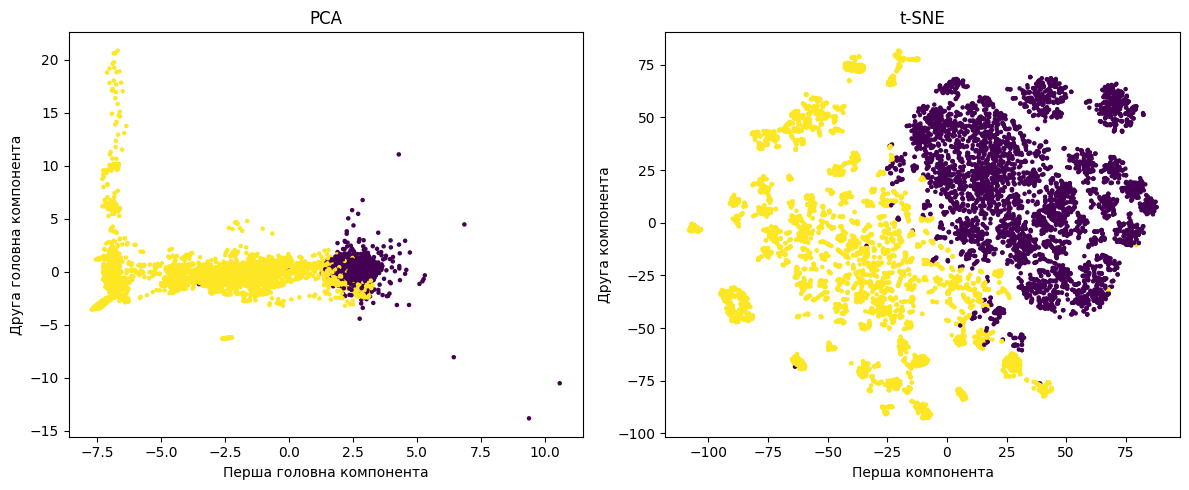

In [3]:
target = 'Class'
features = df.drop(columns=[target]).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df[target], cmap='viridis', s=5)
plt.title('PCA')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')

# Візуалізація t-SNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df[target], cmap='viridis', s=5)
plt.title('t-SNE')
plt.xlabel('Перша компонента')
plt.ylabel('Друга компонента')

plt.tight_layout()
plt.show()

### 2. Кластерний аналіз
За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.


Квантування з 64 кольорами
Навчання моделі на невеликій підвибірці даних...
Завершено за 0.469s.
Прогнозування індексів кольорів на повному зображенні...
Завершено за 0.116s.


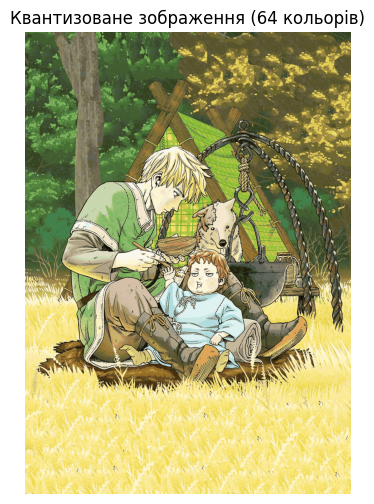


Квантування з 32 кольорами
Навчання моделі на невеликій підвибірці даних...
Завершено за 0.439s.
Прогнозування індексів кольорів на повному зображенні...
Завершено за 0.100s.


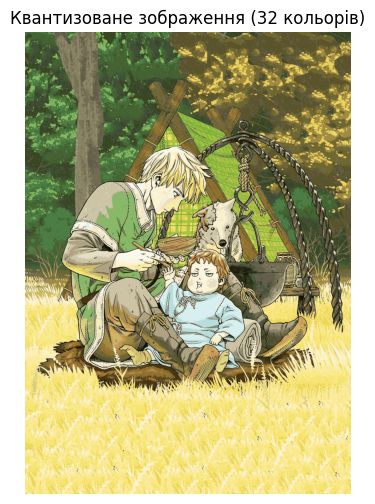


Квантування з 16 кольорами
Навчання моделі на невеликій підвибірці даних...
Завершено за 0.503s.
Прогнозування індексів кольорів на повному зображенні...
Завершено за 0.087s.


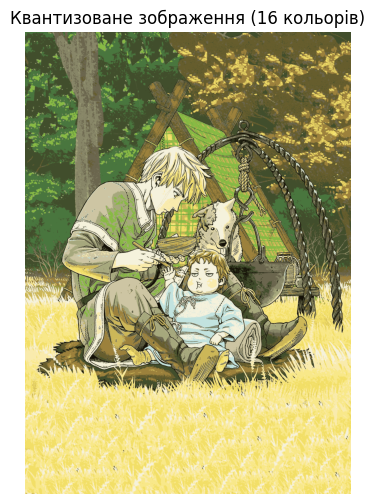


Квантування з 8 кольорами
Навчання моделі на невеликій підвибірці даних...
Завершено за 0.378s.
Прогнозування індексів кольорів на повному зображенні...
Завершено за 0.096s.


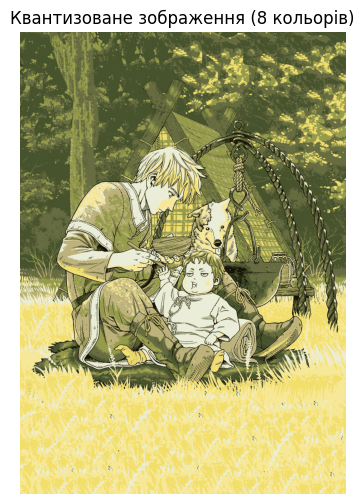


Квантування з 4 кольорами
Навчання моделі на невеликій підвибірці даних...
Завершено за 0.365s.
Прогнозування індексів кольорів на повному зображенні...
Завершено за 0.088s.


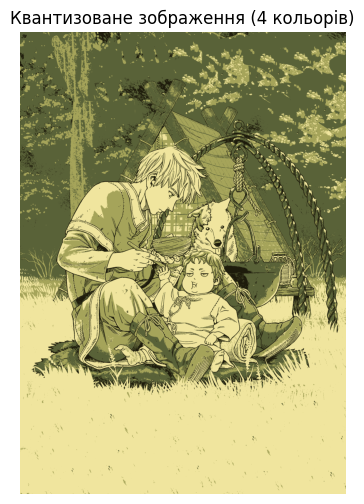


Квантування з 2 кольорами
Навчання моделі на невеликій підвибірці даних...
Завершено за 0.392s.
Прогнозування індексів кольорів на повному зображенні...
Завершено за 0.095s.


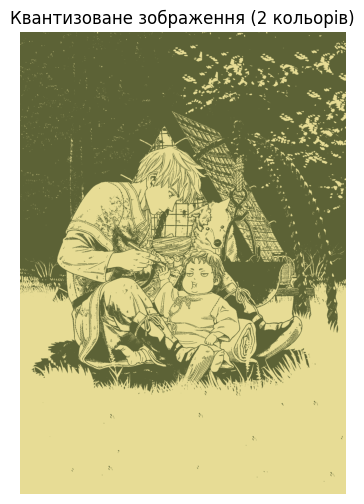

In [4]:
image_path = r'...'

image = io.imread(image_path)
image = img_as_float(image)

w, h, d = original_shape = tuple(image.shape)
assert d == 3

image_array = np.reshape(image, (w * h, d))

n_colors_list = [64, 32, 16, 8, 4, 2]

def recreate_image(codebook, labels, w, h):
    """Відтворення (квантизованого) зображення з кодової книги та міток"""
    return codebook[labels].reshape(w, h, -1)

for n_colors in n_colors_list:
    print(f"\nКвантування з {n_colors} кольорами")

    print("Навчання моделі на невеликій підвибірці даних...")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    print(f"Завершено за {time() - t0:0.3f}s.")

    print("Прогнозування індексів кольорів на повному зображенні...")
    t0 = time()
    labels = kmeans.predict(image_array)
    print(f"Завершено за {time() - t0:0.3f}s.")

    quantized_image = recreate_image(kmeans.cluster_centers_, labels, w, h)

    plt.figure(figsize=(8, 6))
    plt.axis('off')
    plt.title(f"Квантизоване зображення ({n_colors} кольорів)")
    plt.imshow(quantized_image)
    plt.show()

    io.imsave(f'quantized_{n_colors}.jpg', img_as_ubyte(quantized_image))

### 3. Обробка та класифікація текстових даних
Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості. 

In [5]:
# https://www.kaggle.com/datasets/thedevastator/sms-spam-collection-a-more-diverse-dataset/data
df = pd.read_csv(r'...', encoding='unicode_escape')
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.data.path.append(r'...')
stop_words = set(stopwords.words('english'))

In [7]:
tokenizer = RegexpTokenizer(r'\w+')

def text_preprocessing(text):
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    clean_text = ' '.join(tokens)
    return clean_text

In [8]:
df['clean_sms'] = df['sms'].apply(text_preprocessing)

In [9]:
df.head()

,sms,label,clean_sms
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...\n,0,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah think goes usf lives around though


In [10]:
spam_messages = df[df['label'] == 1]['clean_sms']
ham_messages = df[df['label'] == 0]['clean_sms']

spam_text = ' '.join(spam_messages)
ham_text = ' '.join(ham_messages)

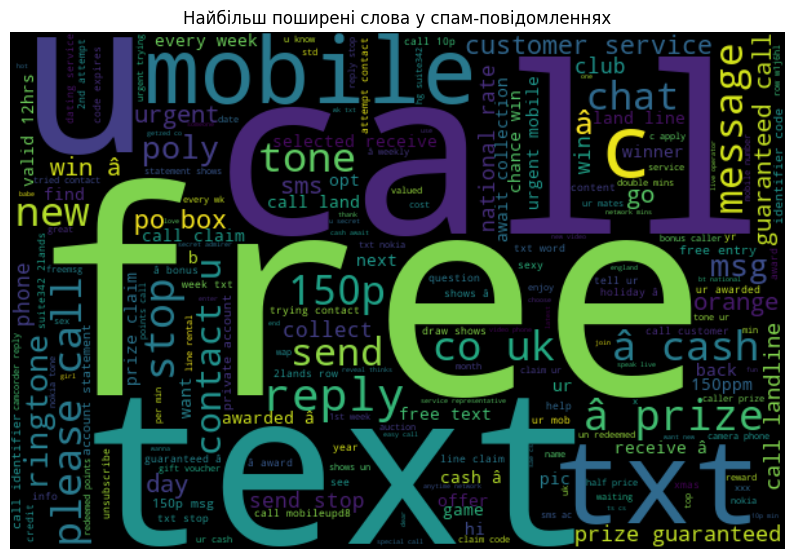

In [11]:
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_text)

plt.figure(figsize=(10, 8))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Найбільш поширені слова у спам-повідомленнях')
plt.show()

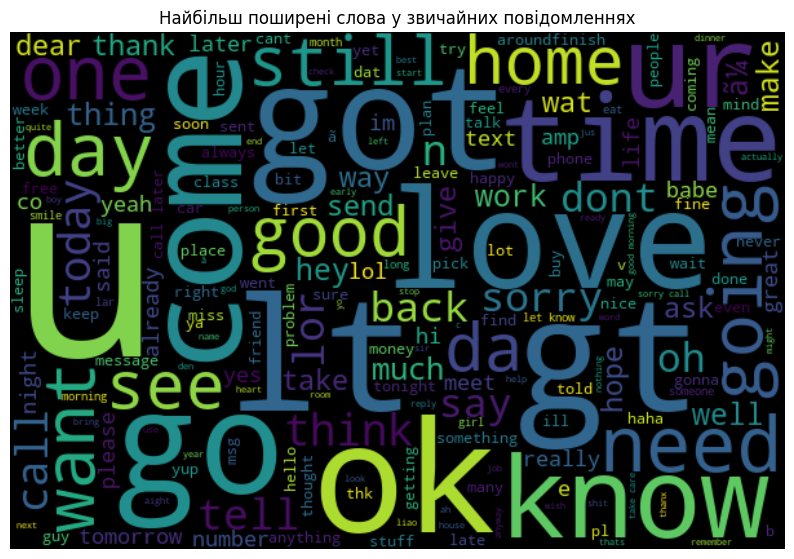

In [12]:
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_text)

plt.figure(figsize=(10, 8))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Найбільш поширені слова у звичайних повідомленнях')
plt.show()

In [13]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_sms'])
y = df['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       954
           1       1.00      0.81      0.89       161

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       954
           1       0.97      0.70      0.81       161

    accuracy                           0.95      1115
   macro avg       0.96      0.85      0.89      1115
weighted avg       0.95      0.95      0.95      1115



In [17]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.98      0.86      0.92       161

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [18]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       1.00      0.87      0.93       161

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [19]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.99      0.91      0.95       161

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [20]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [21]:
model1 = LogisticRegression(max_iter=1000)
model2 = LinearSVC()
model3 = MultinomialNB()

model = VotingClassifier(estimators=[
    ('lr', model1), ('svc', model2), ('nb', model3)], voting='hard')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       954
           1       0.99      0.82      0.90       161

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

